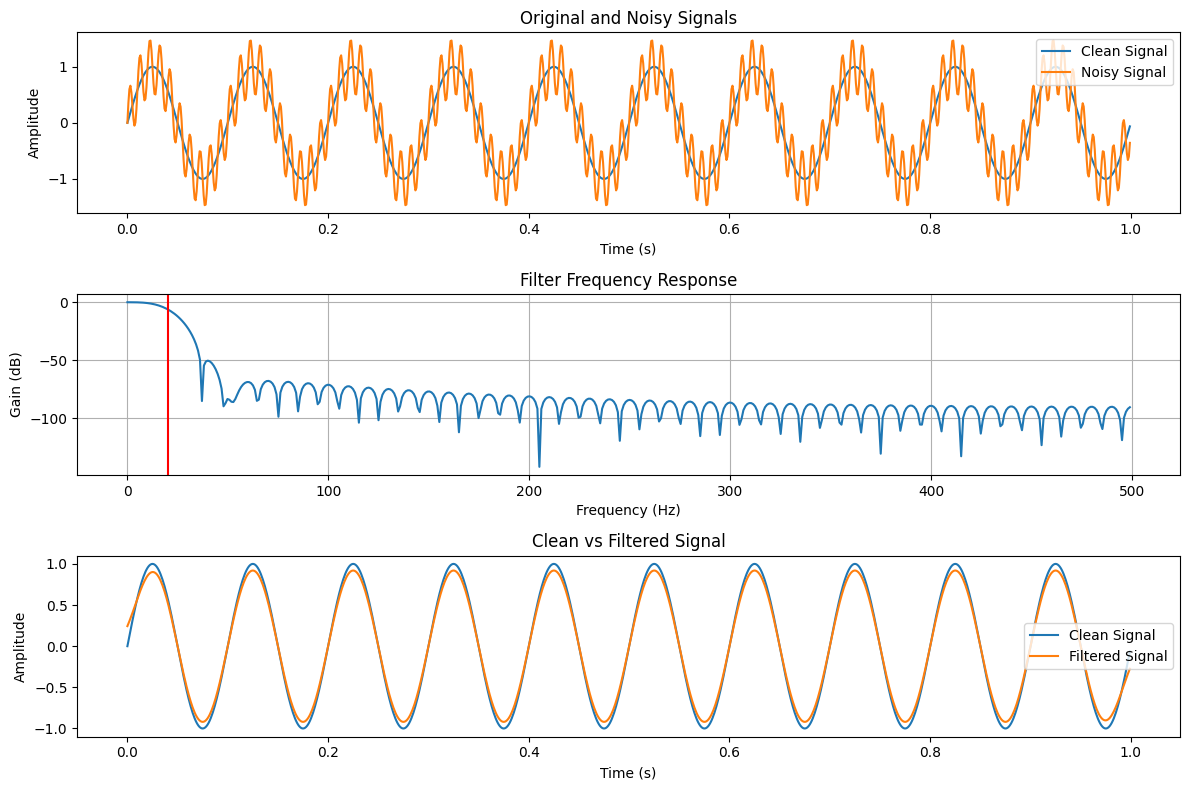

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 1. Generate a test signal with noise
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector

# Create a signal with low and high frequency components
signal_freq = 10  # Hz (signal we want to keep)
noise_freq = 100   # Hz (noise we want to remove)
clean_signal = np.sin(2 * np.pi * signal_freq * t)
noise = 0.5 * np.sin(2 * np.pi * noise_freq * t)
noisy_signal = clean_signal + noise

# 2. Design the low-pass FIR filter
cutoff_freq = 20  # Cutoff frequency (Hz)
nyquist = 0.5 * fs  # Nyquist frequency
num_taps = 101  # Number of filter coefficients (odd for symmetry)

# Create the filter using the window method
fir_coeff = signal.firwin(num_taps, cutoff_freq/nyquist, window='hamming')

# 3. Apply the filter using convolution
filtered_signal = signal.convolve(noisy_signal, fir_coeff, mode='same')

# 4. Plot the results
plt.figure(figsize=(12, 8))

# Original and noisy signals
plt.subplot(3, 1, 1)
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.title('Original and Noisy Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Frequency response of the filter
plt.subplot(3, 1, 2)
w, h = signal.freqz(fir_coeff)
plt.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
plt.title('Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.axvline(cutoff_freq, color='red')  # Cutoff frequency
plt.grid()

# Filtered signal
plt.subplot(3, 1, 3)
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.title('Clean vs Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()




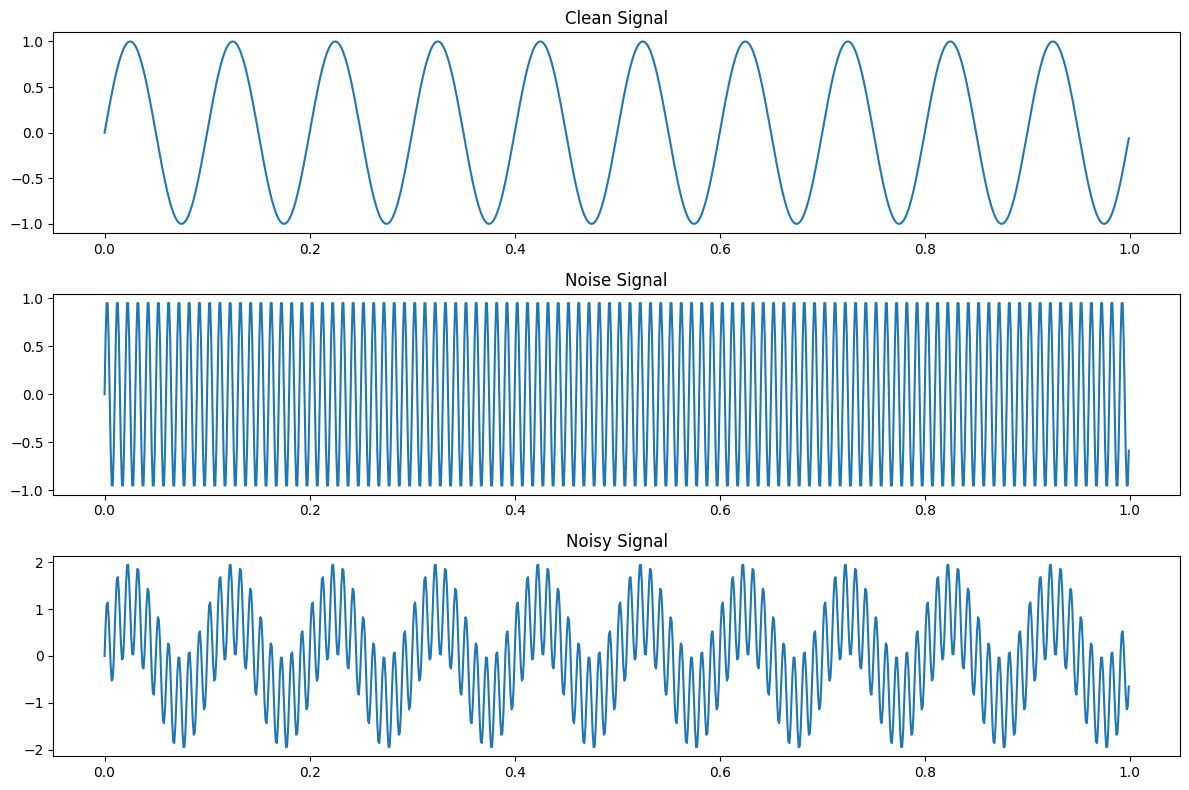

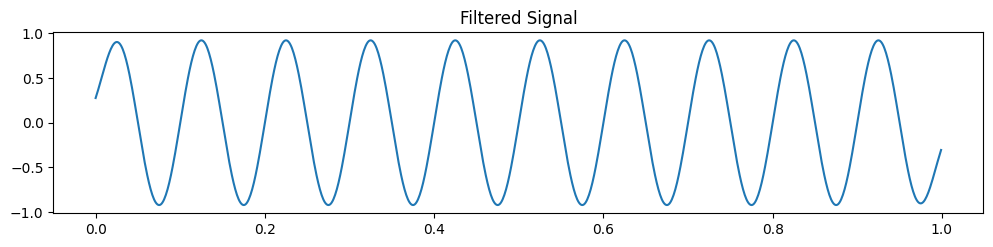

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal


fs = 1000
fc = 10
fn = 100
t = np.linspace(0,1,fs,endpoint=False)
clean_signal = np.sin(2*np.pi*fc*t)
noise_signal = np.sin(2*np.pi*fn*t)

noisy_signal = clean_signal + noise_signal

cutt_off = 20
nyquist = 0.5*fs 
num_taps = 101

fir_coeff = signal.firwin(num_taps,cutt_off/nyquist,window="hamming")

filtered_signal = signal.convolve(noisy_signal,fir_coeff,mode='same')
plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
plt.plot(t,clean_signal)
plt.title("Clean Signal")

plt.subplot(3,1,2)
plt.plot(t,noise_signal)
plt.title("Noise Signal")

plt.subplot(3,1,3)
plt.plot(t,noisy_signal)
plt.title("Noisy Signal")

plt.tight_layout()
plt.show()


plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.plot(t,filtered_signal)
plt.title("Filtered Signal")
plt.show()

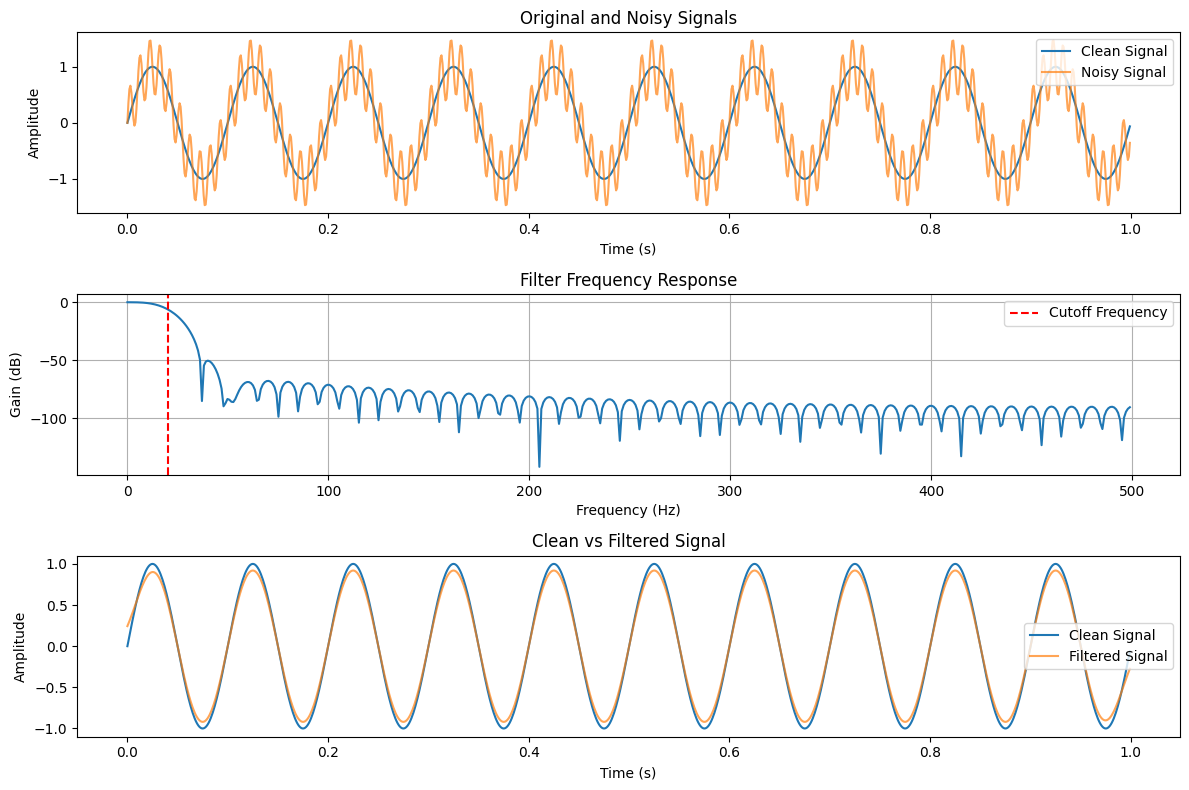

In [2]:
import numpy as np
from scipy import signal

# This code demonstrates the design and application of a low-pass FIR filter
# to remove high-frequency noise from a signal using Python libraries:
# numpy, matplotlib, and scipy.signal.

import matplotlib.pyplot as plt

# 1. Generate a test signal with noise
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector for 1 second

# Create a signal with two frequency components:
signal_freq = 10   # Frequency of the desired signal (Hz)
noise_freq = 100   # Frequency of the noise (Hz)
clean_signal = np.sin(2 * np.pi * signal_freq * t)  # Low-frequency signal
noise = 0.5 * np.sin(2 * np.pi * noise_freq * t)    # High-frequency noise
noisy_signal = clean_signal + noise                 # Combined noisy signal

# 2. Design the low-pass FIR filter
cutoff_freq = 20  # Cutoff frequency for the filter (Hz)
nyquist = 0.5 * fs  # Nyquist frequency (half the sampling rate)
num_taps = 101      # Number of filter coefficients (odd for symmetry)

# Design the FIR filter using the window method (Hamming window)
fir_coeff = signal.firwin(num_taps, cutoff_freq / nyquist, window='hamming')

# 3. Apply the filter to the noisy signal using convolution
filtered_signal = signal.convolve(noisy_signal, fir_coeff, mode='same')

# 4. Plot the results

plt.figure(figsize=(12, 8))

# Plot the clean and noisy signals
plt.subplot(3, 1, 1)
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.title('Original and Noisy Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the frequency response of the filter
plt.subplot(3, 1, 2)
w, h = signal.freqz(fir_coeff)
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)))
plt.title('Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.axvline(cutoff_freq, color='red', linestyle='--', label='Cutoff Frequency')
plt.grid()
plt.legend()

# Plot the clean and filtered signals
plt.subplot(3, 1, 3)
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, filtered_signal, label='Filtered Signal', alpha=0.7)
plt.title('Clean vs Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# Summary:
# - The first plot shows the original clean signal and the noisy signal.
# - The second plot shows the frequency response of the designed FIR filter.
# - The third plot compares the clean signal with the filtered signal,
#   demonstrating that the filter removes the high-frequency noise while preserving the desired signal.